# 1. Data Preparation:Load and preview dataset
* Check the first few rows using the head() function
* Confirm column names and data types using df.info().
* Identify missing values using df.isnull().sum() 

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from itertools import chain
import os

# Rename the file downloaded. I got a csv file when I clicked on the link, not a zipped file
old_filename = 'netflix_data.csv'
new_filename = 'Netflix_shows_movies.csv'

# Rename the file
try:
    os.rename(old_filename, new_filename)
    print(f"File renamed to: {new_filename}")
except FileNotFoundError:
    print(f"The file '{old_filename}' was not found.")
except Exception as e:
    print(f"An error occurred: {e}")

#load and preview data
df = pd.read_csv('Netflix_shows_movies.csv')
df.head()
df.info()
print("-"*40)
df.isnull().sum()

File renamed to: Netflix_shows_movies.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB
----------------------------------------


show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

# 2. Data Cleaning
* Extract numeric duration (for movies):
* Address missing values

In [ ]:
df['duration_num'] = df['duration'].str.extract('(\\d+)').astype(float)
df['duration_type'] = df['duration'].str.extract('([a-zA-Z]+)')
# Fill empty spaces with the word 'Unknow'
df['country'].fillna('Unknown', inplace=True)
df['title'].fillna('Unknown', inplace=True)
df['director'].fillna('Unknown', inplace=True)
df['cast'].fillna('Unknown', inplace=True)

# 3. Exploratory Data Analysis (EDA)


In [12]:
# Descriptive statistics
df.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_num,duration_type
count,6.234000e+03,6234,6234,6234,6234,6234,6223,6234.00000,6224,6234,6234,6234,6234.000000,6234
unique,NaN,2,6172,3302,5470,555,1524,NaN,14,201,461,6226,NaN,3
top,NaN,Movie,Tunnel,Unknown,Unknown,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,A surly septuagenarian gets another chance at ...,NaN,min
freq,NaN,4265,3,1969,570,2032,122,NaN,2027,1321,299,3,NaN,4265
mean,7.670368e+07,NaN,NaN,NaN,NaN,NaN,NaN,2013.35932,NaN,NaN,NaN,NaN,68.362047,NaN
std,1.094296e+07,NaN,NaN,NaN,NaN,NaN,NaN,8.81162,NaN,NaN,NaN,NaN,50.862874,NaN
min,2.477470e+05,NaN,NaN,NaN,NaN,NaN,NaN,1925.00000,NaN,NaN,NaN,NaN,1.000000,NaN
25%,8.003580e+07,NaN,NaN,NaN,NaN,NaN,NaN,2013.00000,NaN,NaN,NaN,NaN,2.000000,NaN
50%,8.016337e+07,NaN,NaN,NaN,NaN,NaN,NaN,2016.00000,NaN,NaN,NaN,NaN,87.000000,NaN
75%,8.024489e+07,NaN,NaN,NaN,NaN,NaN,NaN,2018.00000,NaN,NaN,NaN,NaN,105.000000,NaN


<Axes: title={'center': 'Movies vs TV Shows'}, xlabel='type'>

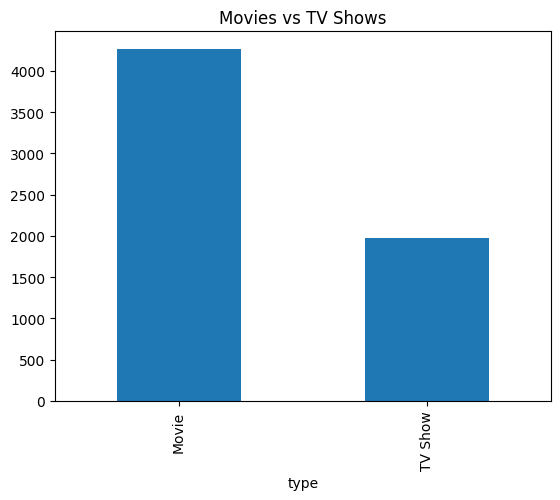

In [13]:
# Distribution of Movies vs TV Shows
df['type'].value_counts().plot(kind='bar', title='Movies vs TV Shows')

<Axes: ylabel='country'>

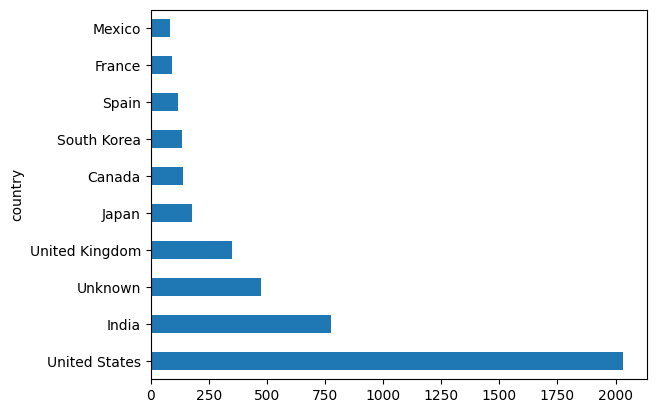

In [14]:
#Top countries by count
df['country'].value_counts().head(10).plot(kind='barh')

<Axes: title={'center': 'Content Released per Year'}, xlabel='release_year'>

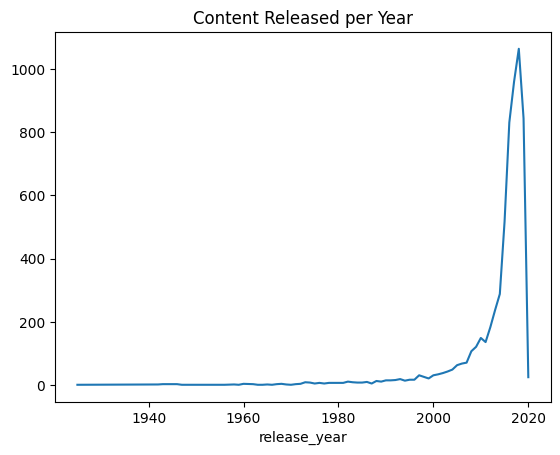

In [15]:

# Releases over time
df['release_year'].value_counts().sort_index().plot(kind='line', title='Content Released per Year')

# Cast and Director Analysis
* Lets compute the most common actors

In [16]:
df['director'].value_counts().head(10)
from collections import Counter

cast_list = df['cast'].dropna().str.split(', ')
all_cast = [actor for sublist in cast_list for actor in sublist]
pd.Series(Counter(all_cast)).sort_values(ascending=False).head(10)


Unknown             570
Anupam Kher          33
Shah Rukh Khan       30
Naseeruddin Shah     27
Om Puri              27
Akshay Kumar         26
Yuki Kaji            26
Takahiro Sakurai     25
Paresh Rawal         25
Amitabh Bachchan     24
dtype: int64

# 4. Create visualisations using matplotlib

/var/folders/g_/lqzhb1v91x5fq4h7qtwynr3c0000gn/T/ipykernel_72818/2711485409.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.head(10).values, y=genre_counts.head(10).index, palette='viridis')


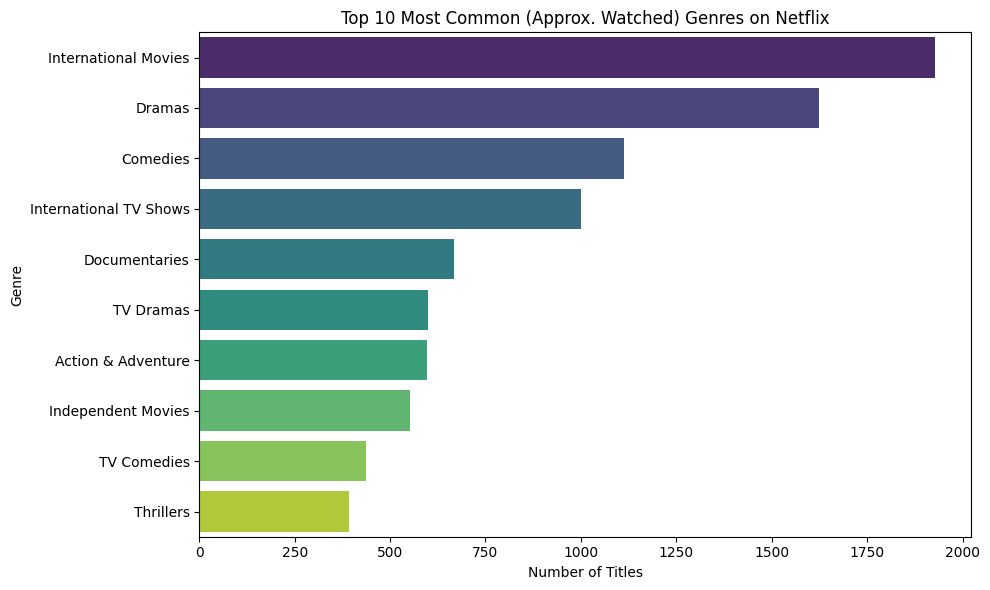

In [8]:
# Split the 'listed_in' column by commas and flatten the list
genres = df['listed_in'].dropna().str.split(', ')
all_genres = list(chain.from_iterable(genres))
genre_counts = pd.Series(Counter(all_genres)).sort_values(ascending=False)

# Plot top 10 genres
plt.figure(figsize=(10,6))
sns.barplot(x=genre_counts.head(10).values, y=genre_counts.head(10).index, palette='viridis')
plt.title('Top 10 Most Common (Approx. Watched) Genres on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()


/var/folders/g_/lqzhb1v91x5fq4h7qtwynr3c0000gn/T/ipykernel_72818/2294319808.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rating_counts.values, y=rating_counts.index, palette='Set2')


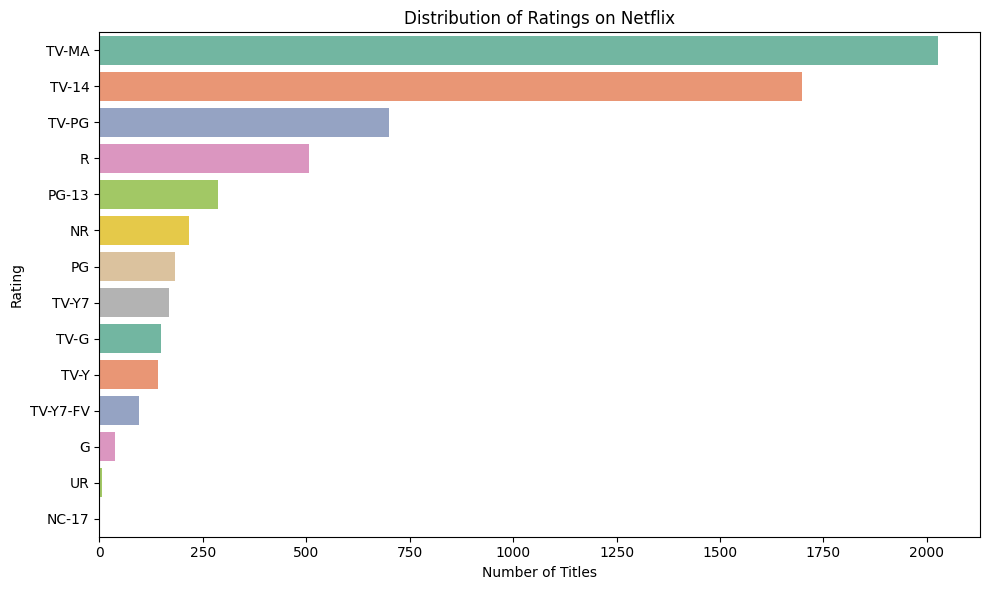

In [9]:
# Rating distribution
rating_counts = df['rating'].value_counts()

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=rating_counts.values, y=rating_counts.index, palette='Set2')
plt.title('Distribution of Ratings on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Rating')
plt.tight_layout()
plt.show()
